# Import Necessary Packages

In [674]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

https://archive.ics.uci.edu/dataset/14/breast+cancer

In [675]:
column_names = [
    'Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
    'deg-malig', 'breast', 'breast-quad', 'irradiat'
]

In [676]:
data=pd.read_csv('C:/Rohith/Backup/Desktop/SEM 6/Machine Learning Lab/Practices/Breast Cancer dataset/breast-cancer.data',names=column_names)

In [677]:
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [678]:
# Display rows with null values
print("\nRows with null values:")
print(data[data.isnull().any(axis=1)])


Rows with null values:
Empty DataFrame
Columns: [Class, age, menopause, tumor-size, inv-nodes, node-caps, deg-malig, breast, breast-quad, irradiat]
Index: []


In [679]:
# Handle missing values by filling them with the mode of the respective column
data = data.replace('?', pd.NA)
# data = data.apply(lambda x: x.fillna(x.mode()[0]))

In [680]:
# Display rows with null values
print("\nRows with null values:")
print(data[data.isnull().any(axis=1)])


Rows with null values:
                    Class    age menopause tumor-size inv-nodes node-caps   
145  no-recurrence-events  40-49   premeno      25-29       0-2      <NA>  \
163  no-recurrence-events  60-69      ge40      25-29       3-5      <NA>   
164  no-recurrence-events  60-69      ge40      25-29       3-5      <NA>   
183  no-recurrence-events  50-59      ge40      30-34      9-11      <NA>   
184  no-recurrence-events  50-59      ge40      30-34      9-11      <NA>   
206     recurrence-events  50-59      ge40      30-34       0-2        no   
233     recurrence-events  70-79      ge40      15-19      9-11      <NA>   
263     recurrence-events  50-59      lt40      20-24       0-2      <NA>   
264     recurrence-events  50-59      lt40      20-24       0-2      <NA>   

     deg-malig breast breast-quad irradiat  
145          2   left   right_low      yes  
163          1  right     left_up      yes  
164          1  right    left_low      yes  
183          3   left    

In [681]:
data.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [682]:
data.shape

(286, 10)

In [683]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    278 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  285 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


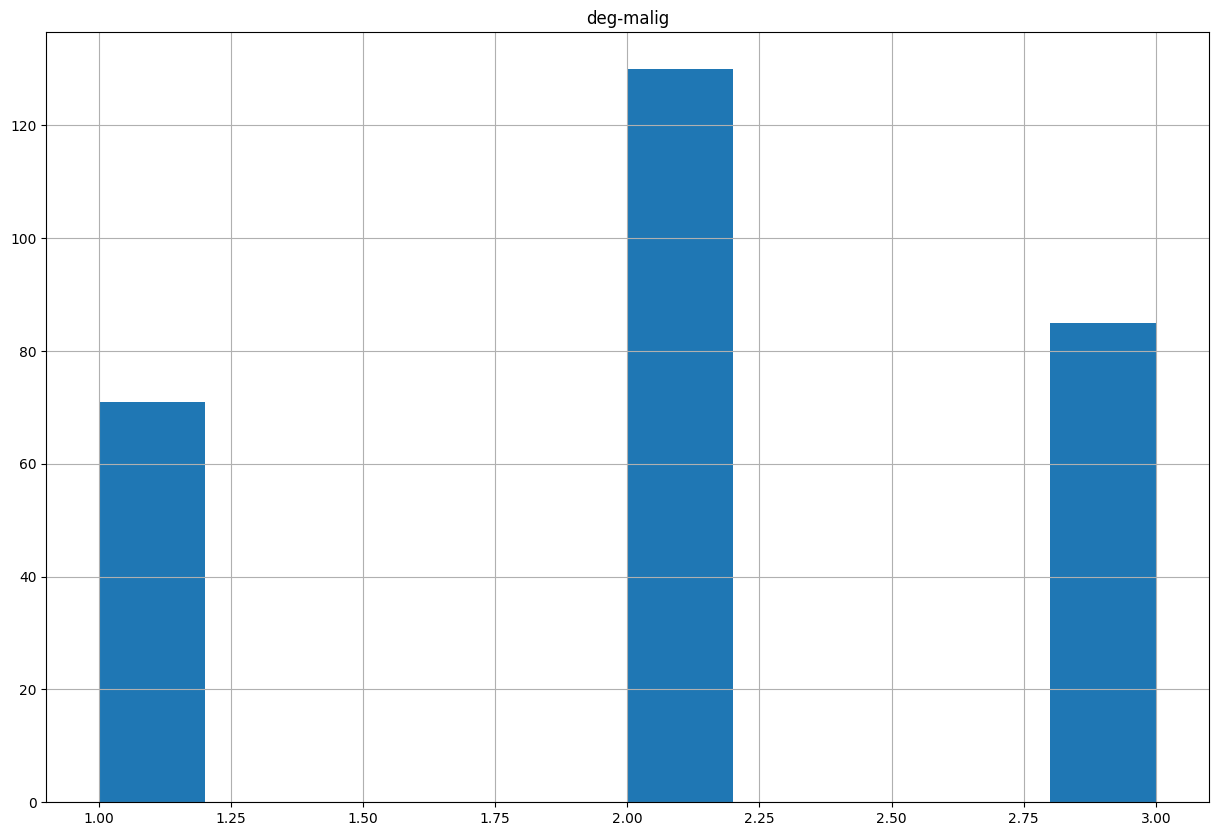

In [684]:
data.hist(figsize=(15,10))
plt.show()

In [685]:
data.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64

In [686]:
data.dropna(inplace=True)

In [687]:
data.shape

(277, 10)

In [688]:
data.duplicated().sum()

14

In [689]:
data.drop_duplicates(inplace=True)

In [690]:
data.shape

(263, 10)

<Axes: >

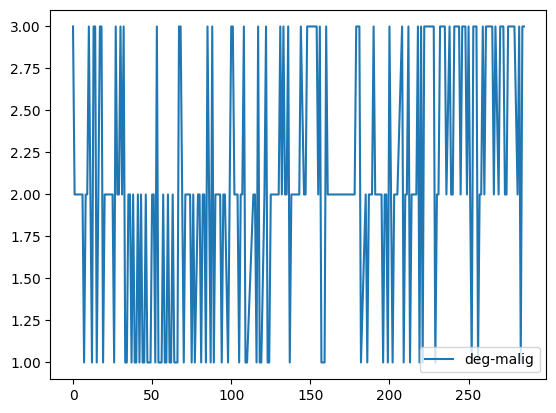

In [691]:
data.plot()

In [692]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le

LabelEncoder()

In [693]:
# Encode categorical variables
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        # label_encoders[column] = le

In [694]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Class        263 non-null    int32
 1   age          263 non-null    int32
 2   menopause    263 non-null    int32
 3   tumor-size   263 non-null    int32
 4   inv-nodes    263 non-null    int32
 5   node-caps    263 non-null    int32
 6   deg-malig    263 non-null    int64
 7   breast       263 non-null    int32
 8   breast-quad  263 non-null    int32
 9   irradiat     263 non-null    int32
dtypes: int32(9), int64(1)
memory usage: 13.4 KB


<Axes: >

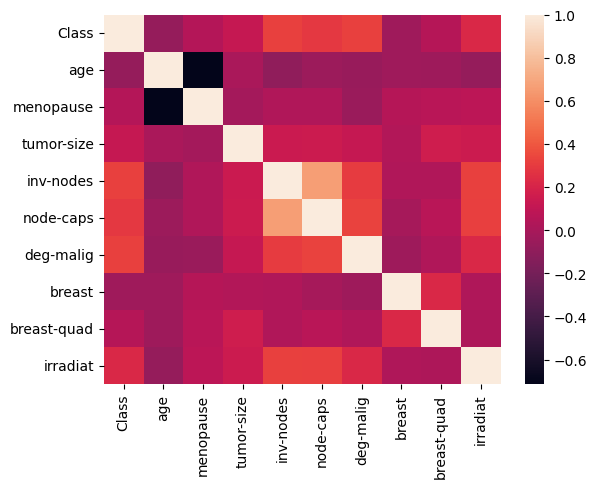

In [695]:
sns.heatmap(data.corr())

# Training and Testing

In [696]:
X=data.drop('Class',axis=1)
y=data['Class']

In [697]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print('X_train.shape = ',X_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_train.shape = ',y_train.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (210, 9)
X_test.shape =  (53, 9)
y_train.shape =  (210,)
y_test.shape =  (53,)


In [698]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top k features using SelectKBest
k = 5  # You can change this to the number of features you want to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)


X_train=X_train_kbest
X_test=X_test_kbest

# Model 1 Linear Regression

In [699]:
from sklearn.linear_model import LinearRegression

li=LinearRegression()
li

LinearRegression()

In [700]:
li.fit(X_train,y_train)
y_pred=li.predict(X_test)
accuracy=li.score(X_test,y_test)
accuracy

0.2209189639825494

In [701]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",mae)

mse=mean_squared_error(y_test,y_pred)
print("Mean squared error: ",mse)

rmse=np.sqrt(mse)
print("Root mean squared error: ",rmse)

Mean Absolute Error:  0.3332073553782254
Mean squared error:  0.15809049146669518
Root mean squared error:  0.3976059499890503


In [702]:
from sklearn.metrics import accuracy_score,r2_score

y_train_pred=li.predict(X_train)
train_r2=r2_score(y_train,y_train_pred)

y_test_pred=li.predict(X_test)
test_r2=r2_score(y_test,y_test_pred)

if train_r2 > test_r2 and train_r2-test_r2>0.1:
    print("The model is likely overfitting")
elif train_r2 < test_r2:
    print("The model is likely underfitting")
else:
    print("The model is likely to be a good fit")

The model is likely underfitting


In [703]:
# perform 5 fold cross validation
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(li,X_train,y_train,cv=5)
print("Cross validation scores: ",cv_scores)
print("Mean cross validation scores: ",cv_scores.mean())

Cross validation scores:  [-0.16559864  0.08642917 -0.24344929  0.25120488  0.02250777]
Mean cross validation scores:  -0.009781222499757769


In [704]:
# Using KFold custom cross-validation

from sklearn.model_selection import KFold

kf=KFold(n_splits=5)

for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    li=LinearRegression()
    li.fit(X_train_fold,y_train_fold)
    y_pred_fold=li.predict(X_test_fold)

    accuracy=li.score(X_test_fold,y_test_fold)
    print("Fold accuracy: ",accuracy)

Fold accuracy:  0.0
Fold accuracy:  0.0
Fold accuracy:  0.0
Fold accuracy:  -0.6605725030284832
Fold accuracy:  0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


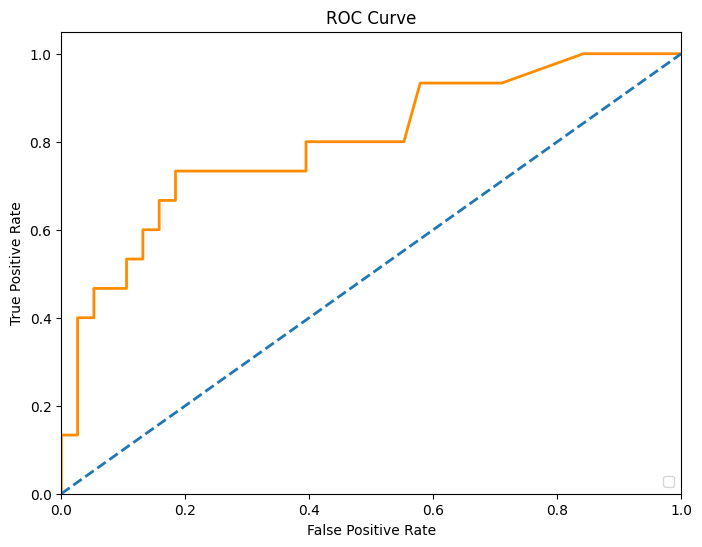

In [705]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [706]:
from sklearn.metrics import confusion_matrix

threshold=y_test.mean()
y_test_class=(y_test>threshold).astype(int)
y_pred_class=(y_pred>threshold).astype(int)

cm=confusion_matrix(y_test_class,y_pred_class)
accuracy=accuracy_score(y_test_class,y_pred_class)
print(accuracy)
print(cm)

0.660377358490566
[[24 14]
 [ 4 11]]


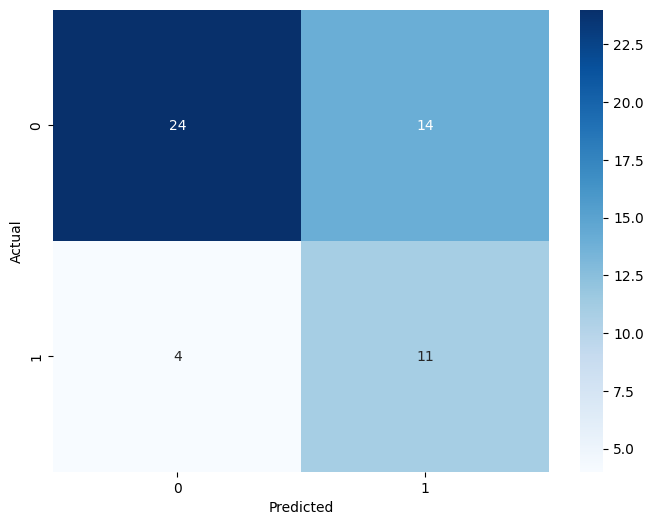

In [707]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [708]:
from sklearn.metrics import classification_report

print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73        38
           1       0.44      0.73      0.55        15

    accuracy                           0.66        53
   macro avg       0.65      0.68      0.64        53
weighted avg       0.74      0.66      0.68        53



In [709]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

li_pca=LinearRegression()
li_pca.fit(X_train_pca,y_train)
y_pred_pca=li_pca.predict(X_test_pca)

accuracy_pca=li_pca.score(X_test_pca,y_test)
print("Accuracy with PCA: ",accuracy_pca)

Accuracy with PCA:  0.17336187740466114


In [710]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis(n_components=min(X.shape[1],len(np.unique(y))-1))

X_train_lda=lda.fit_transform(X_train,y_train)
X_test_lda=lda.transform(X_test)

li_lda=LinearRegression()
li_lda.fit(X_train_lda,y_train)
y_pred_lda=li_lda.predict(X_test_lda)

accuracy_lda=li_lda.score(X_test_lda,y_test)
print("Accuracy with LDA: ",accuracy_lda)

Accuracy with LDA:  0.22091896398254918


# Model 2 Logistic Regression

In [711]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr

LogisticRegression()

In [712]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy=lr.score(X_test,y_test)
accuracy

0.8113207547169812

In [713]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = lr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely underfitting.


In [714]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(lr,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.71428571 0.69047619 0.69047619 0.78571429 0.69047619]
Mean Cross validation score:  0.7142857142857142


In [715]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    lr=LogisticRegression()
    lr.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=lr.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  0.9245283018867925
Fold Accuracy:  0.9811320754716981
Fold Accuracy:  0.5283018867924528
Fold Accuracy:  0.4807692307692308
Fold Accuracy:  0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


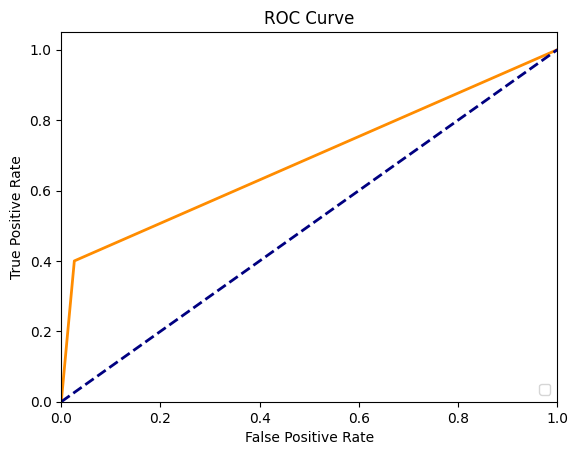

In [716]:
#Plotting ROC curve
from sklearn.metrics import roc_curve,auc,accuracy_score

fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=2)
plt.plot([0,1],[0,1],color="navy",lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [717]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("Logistic REgression Confusion matrix: \n",cm)

Logistic REgression Confusion matrix: 
 [[37  1]
 [ 9  6]]


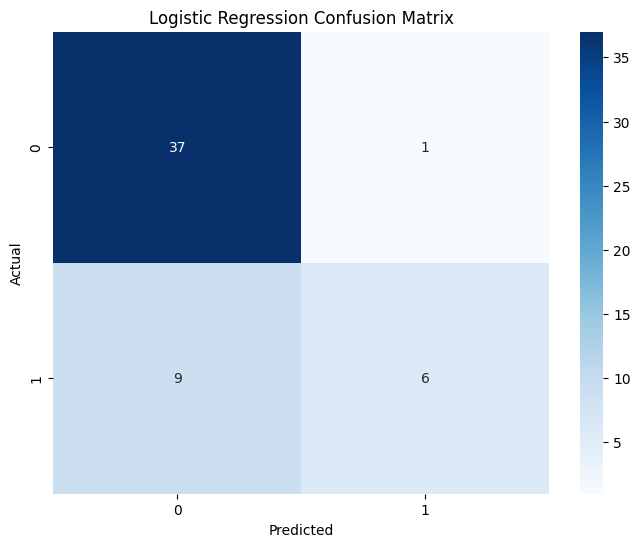

In [718]:
#Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [719]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        38
           1       0.86      0.40      0.55        15

    accuracy                           0.81        53
   macro avg       0.83      0.69      0.71        53
weighted avg       0.82      0.81      0.79        53



In [720]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Logistic Regression with PCA")
lr_pca=LogisticRegression()
lr_pca.fit(X_train_pca,y_train)
y_pred_pca=lr_pca.predict(X_test_pca)
accuracy_pca=lr_pca.score(X_test_pca,y_test)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating Logistic Regression with PCA
Accuracy with PCA:  0.7735849056603774


In [721]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=min(X.shape[1], len(np.unique(y)) - 1))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Logistic Regression with LDA")
lr_lda=LogisticRegression()
lr_lda.fit(X_train_lda,y_train)
y_pred_lda=lr_lda.predict(X_test_lda)
accuracy_lda=lr_lda.score(X_test_lda,y_test)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating Logistic Regression with LDA
Accuracy with LDA:  0.7924528301886793


# Model 3 SVM

In [722]:
from sklearn.svm import SVC
svm_classifier=SVC(probability=True)
svm_classifier

SVC(probability=True)

In [723]:
svm_classifier.fit(X_train,y_train)
y_pred=svm_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7735849056603774

In [724]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = svm_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely underfitting.


In [725]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(svm_classifier,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.71428571 0.61904762 0.64285714 0.69047619 0.66666667]
Mean Cross validation score:  0.6666666666666667


In [726]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    svm_classifier=SVC(probability=True)
    svm_classifier.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=svm_classifier.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  1.0


Fold Accuracy:  1.0
Fold Accuracy:  0.5849056603773585
Fold Accuracy:  0.4423076923076923
Fold Accuracy:  0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


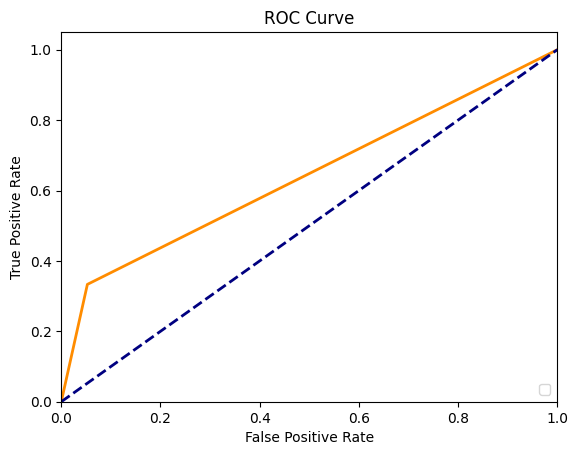

In [727]:
#Plotting ROC_curve
from sklearn.metrics import roc_curve,auc,accuracy_score

fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [728]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("SVM Confusion Matrix: \n",cm)

SVM Confusion Matrix: 
 [[36  2]
 [10  5]]


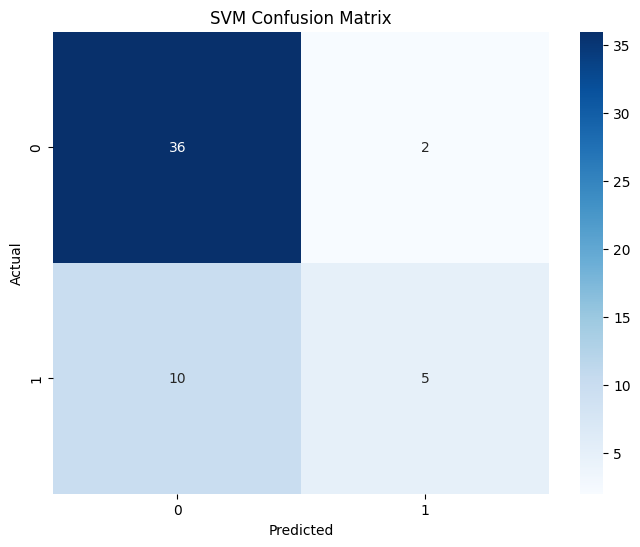

In [729]:
#Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

In [730]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        38
           1       0.71      0.33      0.45        15

    accuracy                           0.77        53
   macro avg       0.75      0.64      0.66        53
weighted avg       0.76      0.77      0.74        53



In [731]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating SVM with PCA")
svm_classifier_pca=SVC(probability=True)
svm_classifier_pca.fit(X_train_pca,y_train)
y_pred_pca=svm_classifier_pca.predict(X_test_pca)
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating SVM with PCA
Accuracy with PCA:  0.8113207547169812


In [732]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=min(X.shape[1], len(np.unique(y)) - 1))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating SVM with LDA")
svm_classifier_lda=SVC(probability=True)
svm_classifier_lda.fit(X_train_lda,y_train)
y_pred_lda=svm_classifier_lda.predict(X_test_lda)
accuracy_lda=accuracy_score(y_test,y_pred_lda)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating SVM with LDA
Accuracy with LDA:  0.8113207547169812


# Model 4 Decision Tree

In [733]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier=DecisionTreeClassifier()
dt_classifier

DecisionTreeClassifier()

In [734]:
dt_classifier.fit(X_train,y_train)
y_pred=dt_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7358490566037735

In [735]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = dt_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = dt_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely overfitting.


In [736]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(dt_classifier,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.76190476 0.69047619 0.66666667 0.64285714 0.64285714]
Mean Cross validation score:  0.680952380952381


In [737]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    dt_classifier=DecisionTreeClassifier()
    dt_classifier.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=dt_classifier.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  0.6037735849056604
Fold Accuracy:  0.8113207547169812
Fold Accuracy:  0.4528301886792453
Fold Accuracy:  0.38461538461538464
Fold Accuracy:  0.23076923076923078


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


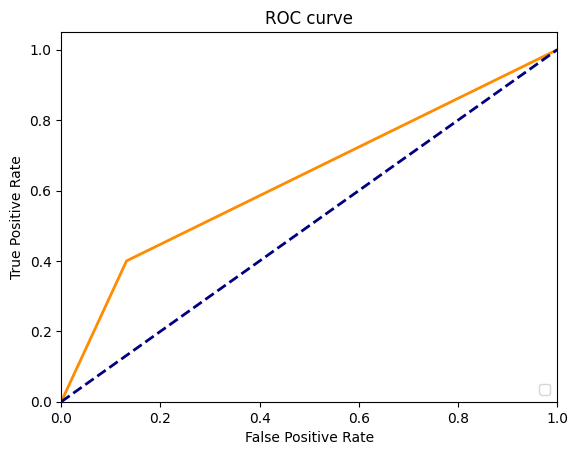

In [738]:
#Plotting ROC Curve
from sklearn.metrics import roc_curve,auc,accuracy_score

fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1], [0,1], color='navy',linestyle='--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [739]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("Decision Tree Confusion Matrix: \n",cm)

Decision Tree Confusion Matrix: 
 [[33  5]
 [ 9  6]]


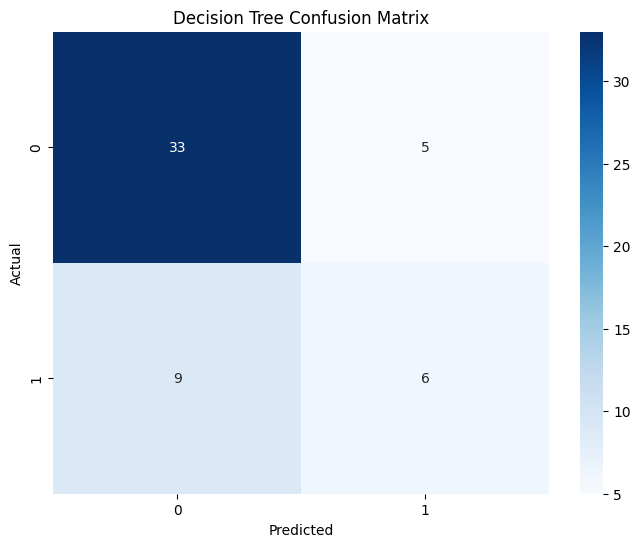

In [740]:
#Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [741]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.82        38
           1       0.55      0.40      0.46        15

    accuracy                           0.74        53
   macro avg       0.67      0.63      0.64        53
weighted avg       0.72      0.74      0.72        53



In [742]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Decision Tree Classifier with PCA")
dt_classifier_pca=DecisionTreeClassifier()
dt_classifier_pca.fit(X_train_pca,y_train)
y_pred_pca=dt_classifier_pca.predict(X_test_pca)
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating Decision Tree Classifier with PCA
Accuracy with PCA:  0.6981132075471698


In [743]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=min(X.shape[1], len(np.unique(y)) - 1))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Decision Tree Classifier with LDA")
dt_classifier_lda=DecisionTreeClassifier()
dt_classifier_lda.fit(X_train_lda,y_train)
y_pred_lda=dt_classifier_lda.predict(X_test_lda)
accuracy_lda=accuracy_score(y_test,y_pred_lda)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating Decision Tree Classifier with LDA
Accuracy with LDA:  0.7735849056603774


# Model 5 Random Forest

In [744]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier()
rf_classifier

RandomForestClassifier()

In [745]:
rf_classifier.fit(X_train,y_train)
y_pred=rf_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7547169811320755

In [746]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely overfitting.


In [747]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(rf_classifier,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.80952381 0.71428571 0.71428571 0.78571429 0.64285714]
Mean Cross validation score:  0.7333333333333333


In [748]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    rf_classifier=RandomForestClassifier()
    rf_classifier.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=rf_classifier.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  0.7924528301886793
Fold Accuracy:  0.8867924528301887
Fold Accuracy:  0.49056603773584906
Fold Accuracy:  0.4423076923076923
Fold Accuracy:  0.019230769230769232


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


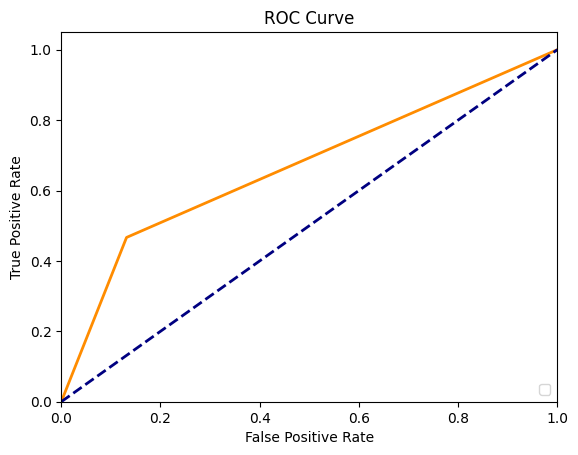

In [749]:
#Plotting ROC curve

from sklearn.metrics import roc_curve,auc,accuracy_score

fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1], [0,1], color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [750]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("Random Forest Confusion Matrix: \n",cm)

Random Forest Confusion Matrix: 
 [[33  5]
 [ 8  7]]


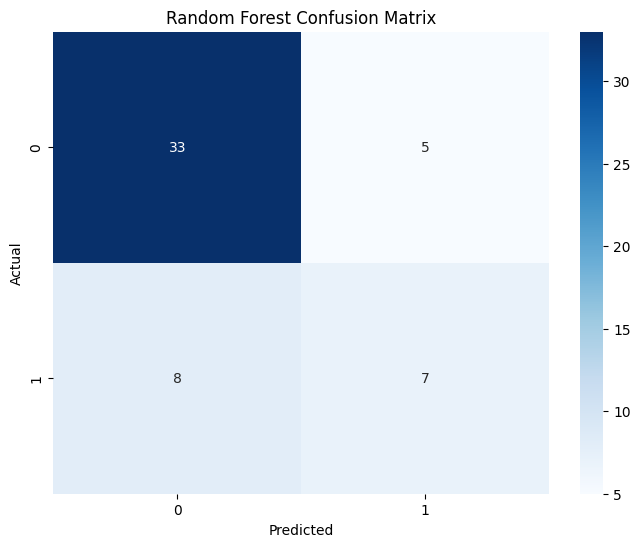

In [751]:
#Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [752]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84        38
           1       0.58      0.47      0.52        15

    accuracy                           0.75        53
   macro avg       0.69      0.67      0.68        53
weighted avg       0.74      0.75      0.75        53



In [753]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Random Forest Classifier with PCA")
rf_classifier_pca=RandomForestClassifier()
rf_classifier_pca.fit(X_train_pca,y_train)
y_pred_pca=rf_classifier_pca.predict(X_test_pca)
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating Random Forest Classifier with PCA
Accuracy with PCA:  0.7169811320754716


In [754]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=min(X.shape[1], len(np.unique(y)) - 1))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Random Forest Classifier with LDA")
rf_classifier_lda=RandomForestClassifier()
rf_classifier_lda.fit(X_train_lda,y_train)
y_pred_lda=rf_classifier_lda.predict(X_test_lda)
accuracy_lda=accuracy_score(y_test,y_pred_lda)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating Random Forest Classifier with LDA
Accuracy with LDA:  0.7358490566037735


# Model 6 KNeighbors

In [755]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier=KNeighborsClassifier()
knn_classifier

KNeighborsClassifier()

In [756]:
knn_classifier.fit(X_train,y_train)
y_pred=knn_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7735849056603774

In [757]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = knn_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = knn_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely underfitting.


In [758]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(knn_classifier,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.64285714 0.69047619 0.64285714 0.73809524 0.71428571]
Mean Cross validation score:  0.6857142857142857


In [759]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    knn_classifier=KNeighborsClassifier()
    knn_classifier.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=knn_classifier.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  0.8679245283018868
Fold Accuracy:  0.9433962264150944
Fold Accuracy:  0.5849056603773585
Fold Accuracy:  0.4807692307692308
Fold Accuracy:  0.019230769230769232


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


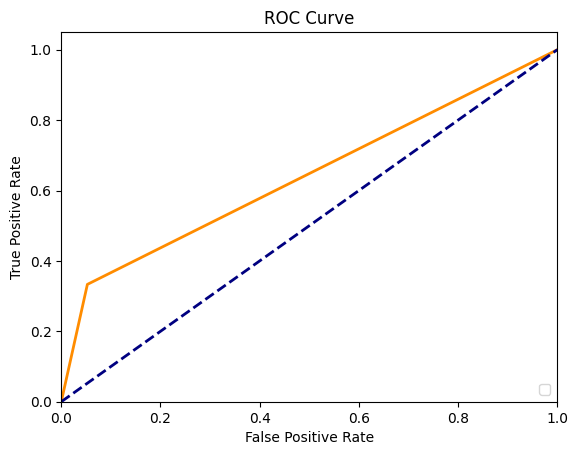

In [760]:
#Plotting ROC_curve
from sklearn.metrics import roc_curve,auc,accuracy_score

fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [761]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("K Neighbors Confusion Matrix: \n",cm)

K Neighbors Confusion Matrix: 
 [[36  2]
 [10  5]]


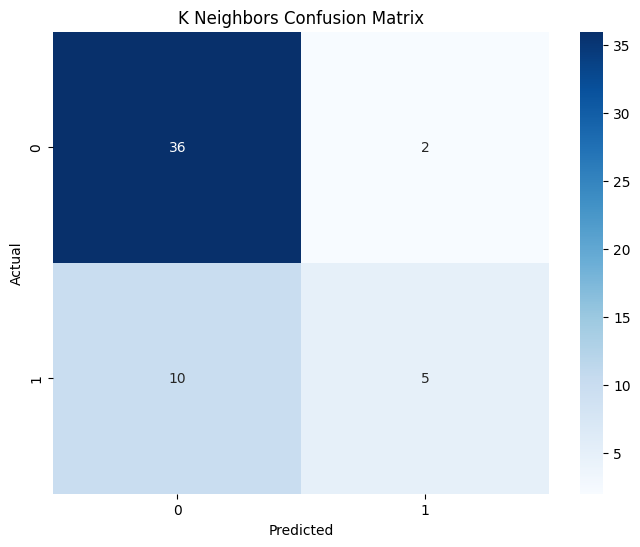

In [762]:
#Plotting Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K Neighbors Confusion Matrix')
plt.show()

In [763]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        38
           1       0.71      0.33      0.45        15

    accuracy                           0.77        53
   macro avg       0.75      0.64      0.66        53
weighted avg       0.76      0.77      0.74        53



In [764]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating KNeighbors Classifier with PCA")
knn_classifier_pca=KNeighborsClassifier()
knn_classifier_pca.fit(X_train_pca,y_train)
y_pred_pca=knn_classifier_pca.predict(X_test_pca)
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating KNeighbors Classifier with PCA
Accuracy with PCA:  0.7735849056603774


In [765]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=min(X.shape[1], len(np.unique(y)) - 1))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating KNeighbors Classifier with LDA")
knn_classifier_lda=KNeighborsClassifier()
knn_classifier_lda.fit(X_train_lda,y_train)
y_pred_lda=knn_classifier_lda.predict(X_test_lda)
accuracy_lda=accuracy_score(y_test,y_pred_lda)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating KNeighbors Classifier with LDA
Accuracy with LDA:  0.7735849056603774


# Model 7 PLA

In [766]:
from sklearn.linear_model import Perceptron

pla_classifier=Perceptron(max_iter=1000,tol=1e-3,random_state=42)
pla_classifier

Perceptron(random_state=42)

In [767]:
pla_classifier.fit(X_train,y_train)
y_pred=pla_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.4716981132075472

In [768]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = pla_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = pla_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely underfitting.


In [769]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(pla_classifier,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.71428571 0.66666667 0.71428571 0.69047619 0.69047619]
Mean Cross validation score:  0.6952380952380952


In [770]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    pla_classifier=Perceptron(max_iter=1000,tol=1e-3,random_state=42)
    pla_classifier.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=pla_classifier.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  0.4716981132075472
Fold Accuracy:  0.41509433962264153
Fold Accuracy:  0.9811320754716981
Fold Accuracy:  0.4230769230769231
Fold Accuracy:  0.09615384615384616


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


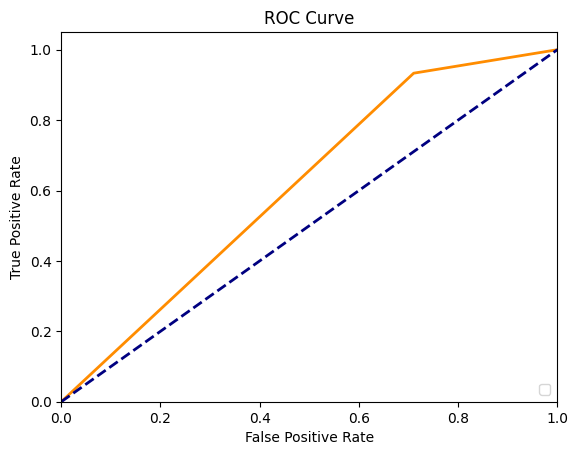

In [771]:
#Plotting ROC_curve
from sklearn.metrics import roc_curve,auc,accuracy_score

fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [772]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("PLA Matrix: \n",cm)

PLA Matrix: 
 [[11 27]
 [ 1 14]]


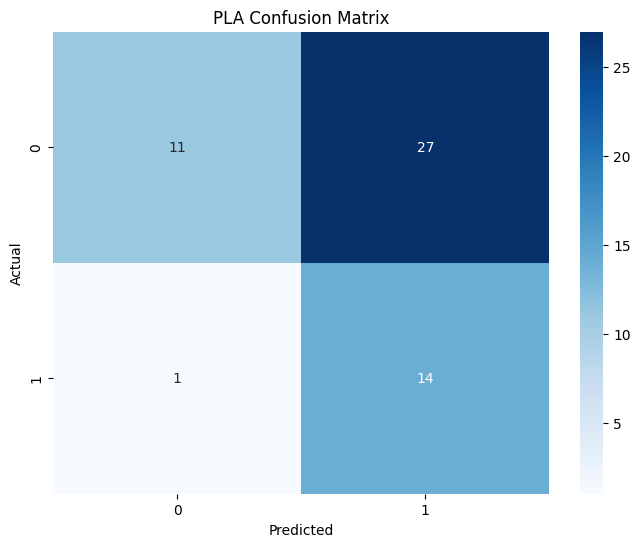

In [773]:
#Plotting Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('PLA Confusion Matrix')
plt.show()

In [774]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.29      0.44        38
           1       0.34      0.93      0.50        15

    accuracy                           0.47        53
   macro avg       0.63      0.61      0.47        53
weighted avg       0.75      0.47      0.46        53



In [775]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating PLA with PCA")
pla_classifier_pca=Perceptron(max_iter=1000,tol=1e-3,random_state=42)
pla_classifier_pca.fit(X_train_pca,y_train)
y_pred_pca=pla_classifier_pca.predict(X_test_pca)
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating PLA with PCA
Accuracy with PCA:  0.4716981132075472


In [776]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=min(X.shape[1], len(np.unique(y)) - 1))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Random Forest Classifier with LDA")
pla_classifier_lda=Perceptron(max_iter=1000,tol=1e-3,random_state=42)
pla_classifier_lda.fit(X_train_lda,y_train)
y_pred_lda=pla_classifier_lda.predict(X_test_lda)
accuracy_lda=accuracy_score(y_test,y_pred_lda)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating Random Forest Classifier with LDA
Accuracy with LDA:  0.7735849056603774


# Model 8 MLP

In [777]:
from sklearn.neural_network import MLPClassifier

mlp_classifier=MLPClassifier(hidden_layer_sizes=(100,),max_iter=300,random_state=42)
mlp_classifier

MLPClassifier(max_iter=300, random_state=42)

In [778]:
mlp_classifier.fit(X_train,y_train)
y_pred=mlp_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7924528301886793

In [779]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = mlp_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = mlp_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely underfitting.


In [780]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(mlp_classifier,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross validation score:  [0.73809524 0.64285714 0.69047619 0.85714286 0.69047619]
Mean Cross validation score:  0.7238095238095237


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [781]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    mlp_classifier=MLPClassifier(hidden_layer_sizes=(100,),max_iter=300,random_state=42)
    mlp_classifier.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=mlp_classifier.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  0.9433962264150944
Fold Accuracy:  0.9245283018867925
Fold Accuracy:  0.4528301886792453
Fold Accuracy:  0.46153846153846156
Fold Accuracy:  0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


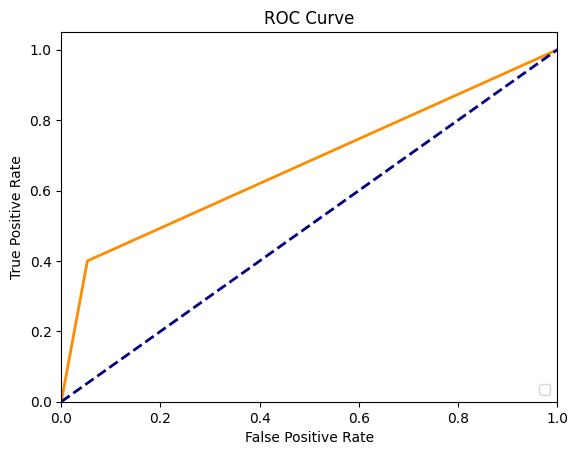

In [782]:
#Plotting ROC_curve
from sklearn.metrics import roc_curve,auc,accuracy_score

fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [783]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("MLP Matrix: \n",cm)

MLP Matrix: 
 [[36  2]
 [ 9  6]]


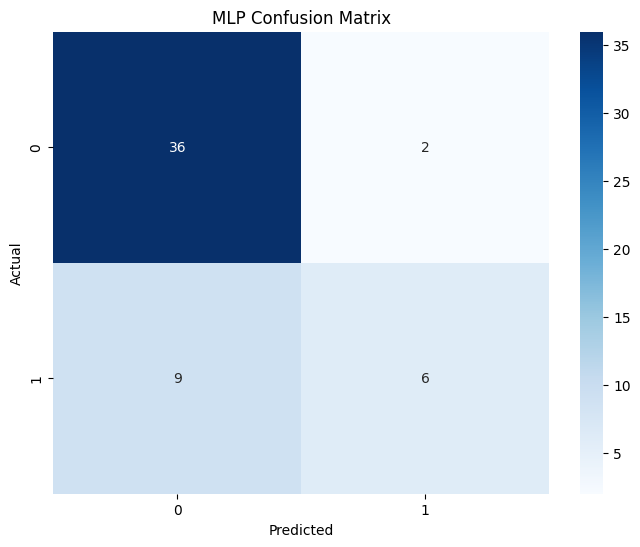

In [784]:
#Plotting Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Confusion Matrix')
plt.show()

In [785]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        38
           1       0.75      0.40      0.52        15

    accuracy                           0.79        53
   macro avg       0.78      0.67      0.69        53
weighted avg       0.79      0.79      0.77        53



In [786]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating MLP with PCA")
mlp_classifier_pca=MLPClassifier(hidden_layer_sizes=(100,),max_iter=300,random_state=42)
mlp_classifier_pca.fit(X_train_pca,y_train)
y_pred_pca=mlp_classifier_pca.predict(X_test_pca)
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating MLP with PCA
Accuracy with PCA:  0.7735849056603774


In [787]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=min(X.shape[1], len(np.unique(y)) - 1))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating MLP with LDA")
mlp_classifier_lda=MLPClassifier(hidden_layer_sizes=(100,),max_iter=300,random_state=42)
mlp_classifier_lda.fit(X_train_lda,y_train)
y_pred_lda=mlp_classifier_lda.predict(X_test_lda)
accuracy_lda=accuracy_score(y_test,y_pred_lda)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating MLP with LDA
Accuracy with LDA:  0.7924528301886793


# Model 9 Naive Bayes

In [788]:
from sklearn.naive_bayes import GaussianNB

nb_classifier=GaussianNB()
nb_classifier

GaussianNB()

In [789]:
nb_classifier.fit(X_train,y_train)
y_pred=nb_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8113207547169812

In [790]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = nb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = nb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely underfitting.


In [791]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(nb_classifier,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.66666667 0.71428571 0.69047619 0.83333333 0.69047619]
Mean Cross validation score:  0.7190476190476189


In [792]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    nb_classifier=GaussianNB()
    nb_classifier.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=nb_classifier.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  1.0
Fold Accuracy:  1.0
Fold Accuracy:  0.4716981132075472
Fold Accuracy:  0.36538461538461536
Fold Accuracy:  0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


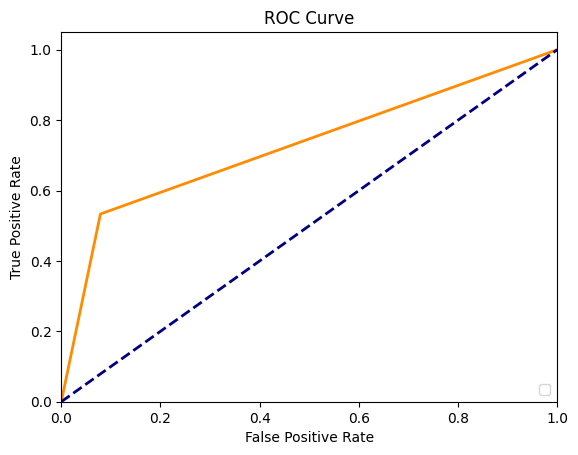

In [793]:
#Plotting ROC_curve
from sklearn.metrics import roc_curve,auc,accuracy_score

fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [794]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("Naive Bayes Matrix: \n",cm)

Naive Bayes Matrix: 
 [[35  3]
 [ 7  8]]


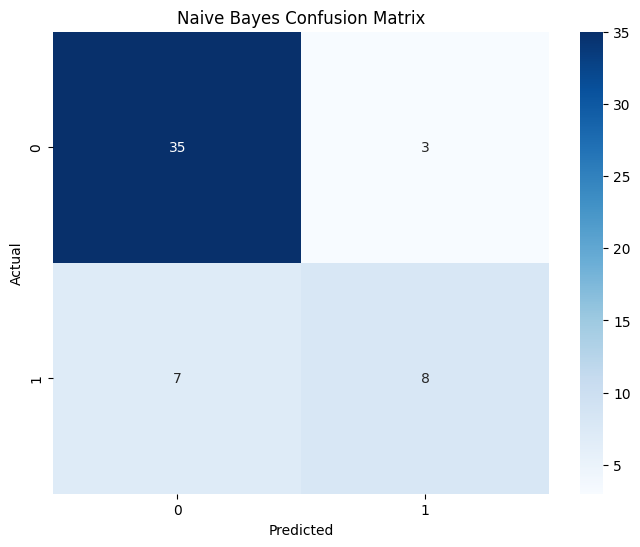

In [795]:
#Plotting Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [796]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88        38
           1       0.73      0.53      0.62        15

    accuracy                           0.81        53
   macro avg       0.78      0.73      0.75        53
weighted avg       0.80      0.81      0.80        53



In [797]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Naive Bayes with PCA")
nb_classifier_pca=GaussianNB()
nb_classifier_pca.fit(X_train_pca,y_train)
y_pred_pca=nb_classifier_pca.predict(X_test_pca)
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating Naive Bayes with PCA
Accuracy with PCA:  0.7735849056603774


In [798]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=min(X.shape[1], len(np.unique(y)) - 1))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Naive Bayes with LDA")
nb_classifier_lda=GaussianNB()
nb_classifier_lda.fit(X_train_lda,y_train)
y_pred_lda=nb_classifier_lda.predict(X_test_lda)
accuracy_lda=accuracy_score(y_test,y_pred_lda)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating Naive Bayes with LDA
Accuracy with LDA:  0.7924528301886793


# Model 10 KMeans Clustering

In [799]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,random_state=42)
kmeans

KMeans(n_clusters=3, random_state=42)

In [800]:
kmeans.fit(X)
y_pred=kmeans.predict(X)

from sklearn.metrics import silhouette_score

silhouette_avg=silhouette_score(X,y_pred)
silhouette_avg

0.29413541299347296

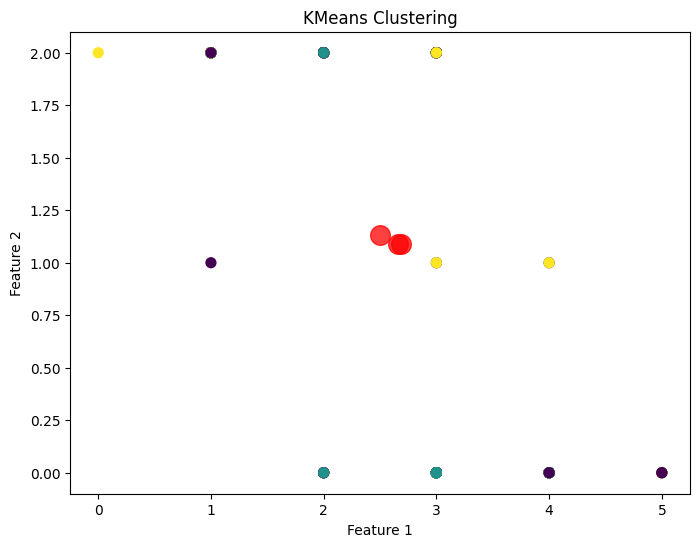

In [801]:
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_pred,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()

# Model 11 Dimensionality Reduction using PCA

In [802]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) #n_components=2: Specifies the number of principal components to retain after dimensionality reduction. In this example, we reduce the data to 2 dimensions.
pca

PCA(n_components=2)

In [803]:
# Fit PCA to the scaled data
X_pca=pca.fit_transform(X)

C:\Users\rohit\AppData\Local\Temp\ipykernel_18400\734557056.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:,0],X_pca[:,1],cmap='viridis')


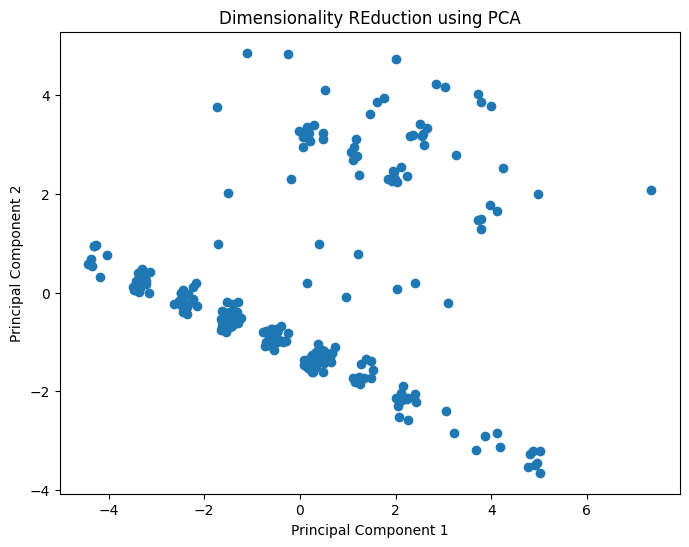

In [804]:
#Plot the reduced data
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],cmap='viridis')
plt.title("Dimensionality REduction using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Model 12 Dimensionality REduction using LDA

In [805]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=min(X.shape[1], len(np.unique(y)) - 1))
lda

LinearDiscriminantAnalysis(n_components=1)

In [806]:
X_lda=lda.fit_transform(X,y) # n_components cannot be larger than min(n_features, n_classes - 1).

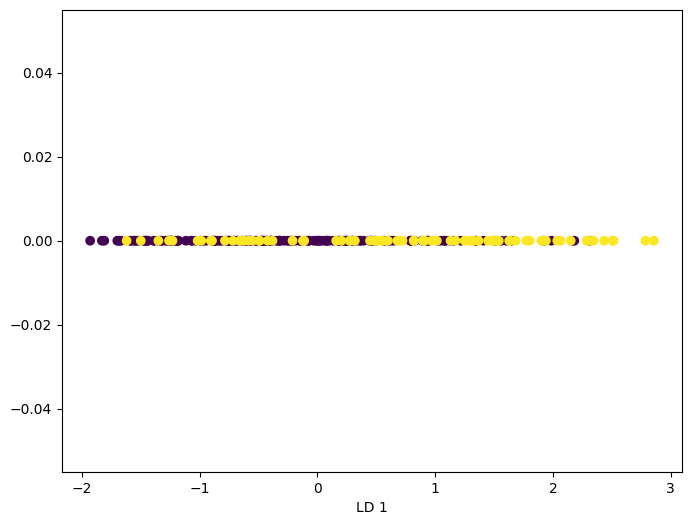

In [807]:
plt.figure(figsize=(8,6))
plt.scatter(X_lda[:,0], np.zeros_like(X_lda[:,0]), c=y, cmap='viridis')
plt.xlabel('LD 1')
plt.show()
